In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\16025\Downloads\CarDekho\car data.csv")
data.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
Age = 2019 - data.Year
data.insert(0, "Age", Age)
data.drop('Year', axis = 1, inplace = True)

In [7]:
data.corr()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner
Age,1.000000,-0.236141,0.047584,0.524342,0.182104
Selling_Price,-0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.089216
Owner,0.182104,-0.088344,0.008057,0.089216,1.000000


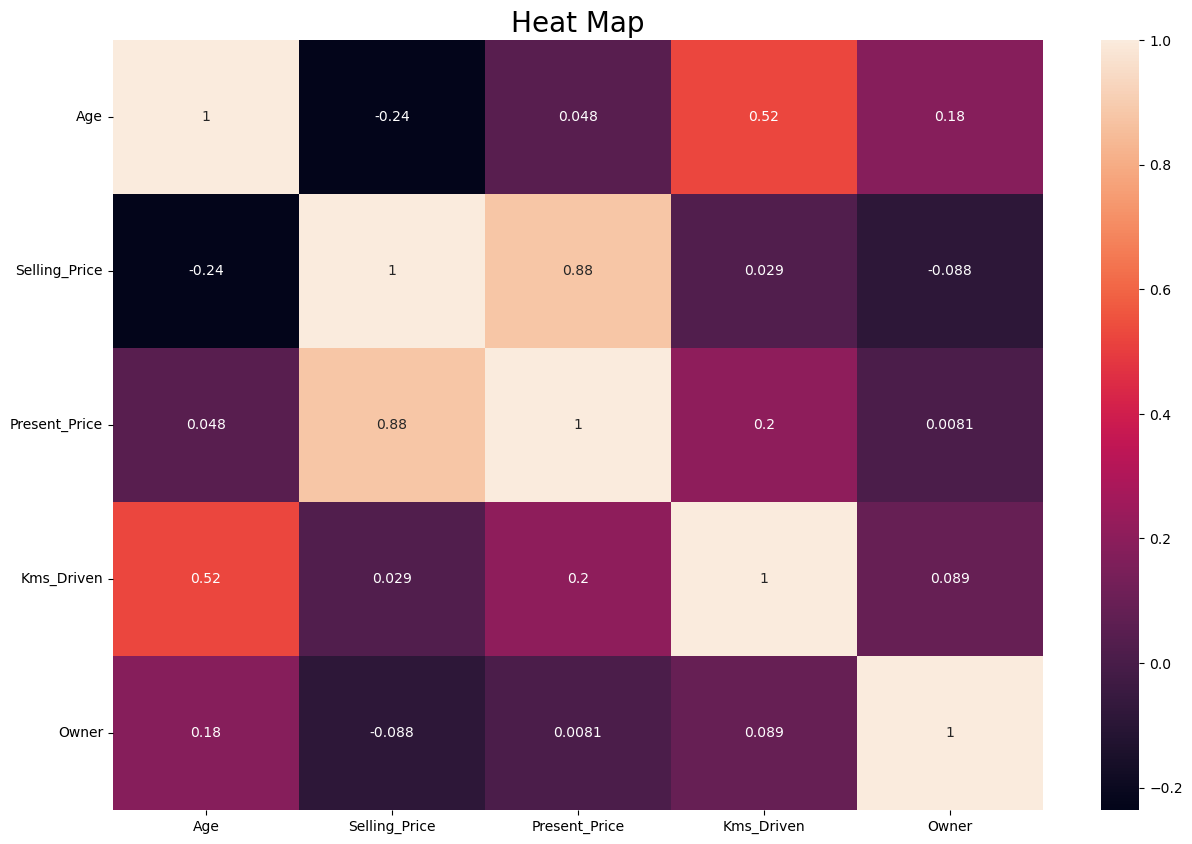

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

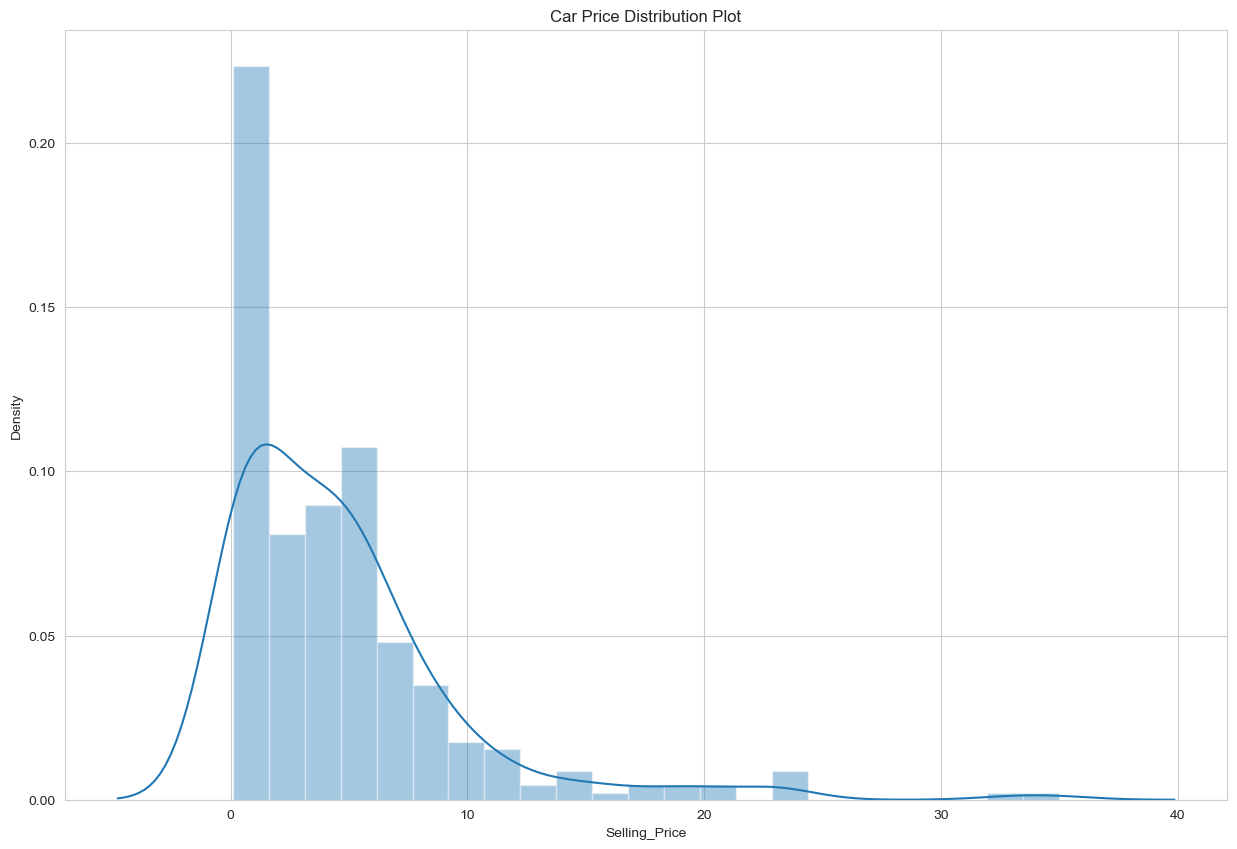

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.Selling_Price)
plt.title('Car Price Distribution Plot')
plt.show()

In [10]:
data["Fuel_Type"].replace({'Petrol':2, 'Diesel':3, 'CNG':4},inplace = True)
data["Seller_Type"].replace({'Dealer':2, 'Individual':3}, inplace = True)
data["Transmission"].replace({'Manual':2, 'Automatic':3}, inplace = True)
data.drop("Car_Name", axis=1, inplace = True)


In [11]:
# Split the data into training and testing sets
x = pd.DataFrame(data, columns = ['Age','Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])
y = data['Selling_Price'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Create a random forest regressor object
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Predict the values for the test data
Y_pred = model.predict(X_test)

# Evaluate the model
# MAE
print("Mean Absolute Error     : ", metrics.mean_absolute_error(Y_test, Y_pred))

# MSE
print("Mean Squared Error      : ", metrics.mean_squared_error(Y_test, Y_pred))

# RMSE
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

# R2 Score
print("R2 Score                : ", metrics.r2_score(Y_test, Y_pred))


Mean Absolute Error     :  0.6249868852459017
Mean Squared Error      :  1.1097970406557374
Root Mean Squared Error :  1.0534690506397126
R2 Score                :  0.9560951436533807


In [12]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the KNN model
knn_reg = KNeighborsRegressor()

# Fit the model on the training data
knn_reg.fit(X_train, Y_train)

# Predict on the test data
Y_pred_knn = knn_reg.predict(X_test)

# Evaluate the model
mae = metrics.mean_absolute_error(Y_test, Y_pred_knn)
mse = metrics.mean_squared_error(Y_test, Y_pred_knn)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(Y_test, Y_pred_knn)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 4.11144262295082
Mean Squared Error (MSE): 32.005917967213115
Root Mean Squared Error (RMSE): 5.657377304653908
R-squared (R2): -0.2661911855179273


In [13]:
# Import the DecisionTreeRegressor class
from sklearn.tree import DecisionTreeRegressor

# Train a decision tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, Y_train)

# Predict using the decision tree model
dt_pred = dt_model.predict(X_test)

# Evaluate the decision tree model
print("Decision Tree Model Evaluation:")
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, dt_pred))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, dt_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, dt_pred)))
print("R2 Score:", metrics.r2_score(Y_test, dt_pred))


Decision Tree Model Evaluation:
Mean Absolute Error: 0.682950819672131
Mean Squared Error: 1.3720754098360657
Root Mean Squared Error: 1.171356226703075
R2 Score: 0.9457191075856651


In [14]:
# Fit the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test data

Y_pred = model.predict(X_test)

# Get the intercept and coefficients of the model

model.intercept_
model.coef_

# Evaluate the model

# MAE
print("Mean Absolute Error     : ", metrics.mean_absolute_error(Y_test, Y_pred))

# MSE
print("Mean Squared Error      : ", metrics.mean_squared_error(Y_test, Y_pred))

# RMSE
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

# R2 Score
print("R2 Score                : ", metrics.r2_score(Y_test, Y_pred))


Mean Absolute Error     :  1.0000326012147738
Mean Squared Error      :  2.1885564456585147
Root Mean Squared Error :  1.4793770464822398
R2 Score                :  0.9134181721224179


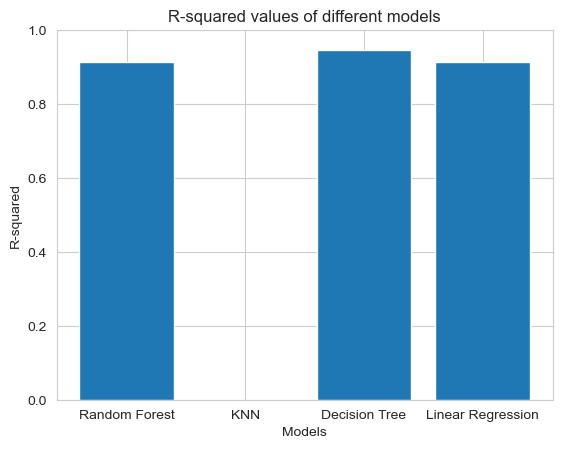

In [15]:
# Create a list of R-squared values
r2_scores = [metrics.r2_score(Y_test, Y_pred),
             metrics.r2_score(Y_test, Y_pred_knn),
             metrics.r2_score(Y_test, dt_pred),
             metrics.r2_score(Y_test, Y_pred)]

# Create a list of model names
models = ['Random Forest', 'KNN', 'Decision Tree', 'Linear Regression']

# Plot the R-squared values as a bar graph
plt.bar(models, r2_scores)
plt.title("R-squared values of different models")
plt.xlabel("Models")
plt.ylabel("R-squared")
plt.ylim(0, 1)
plt.show()


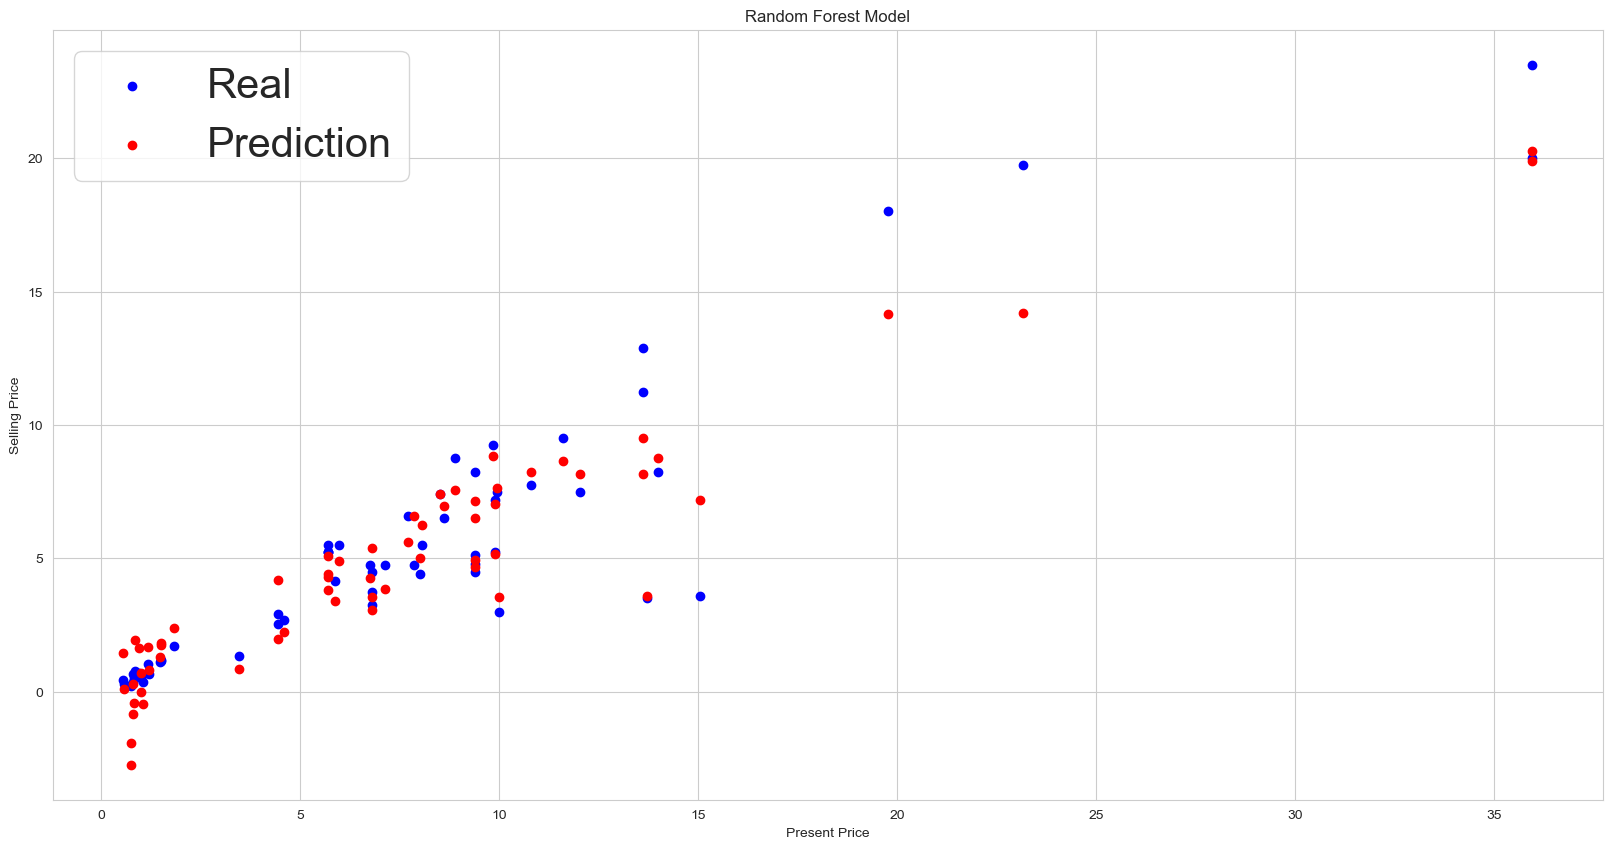

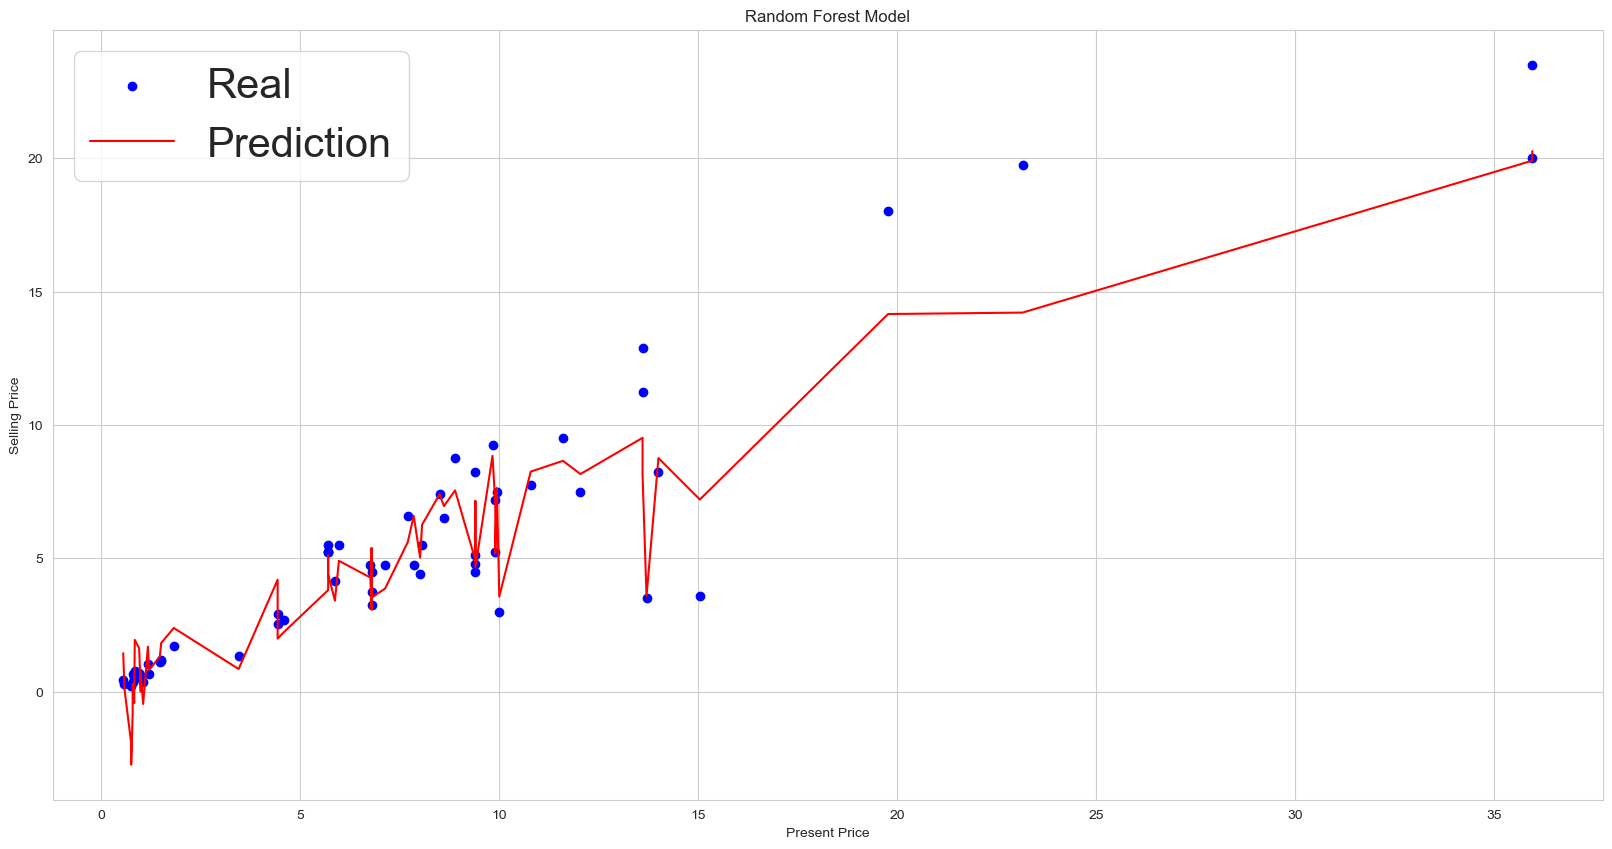

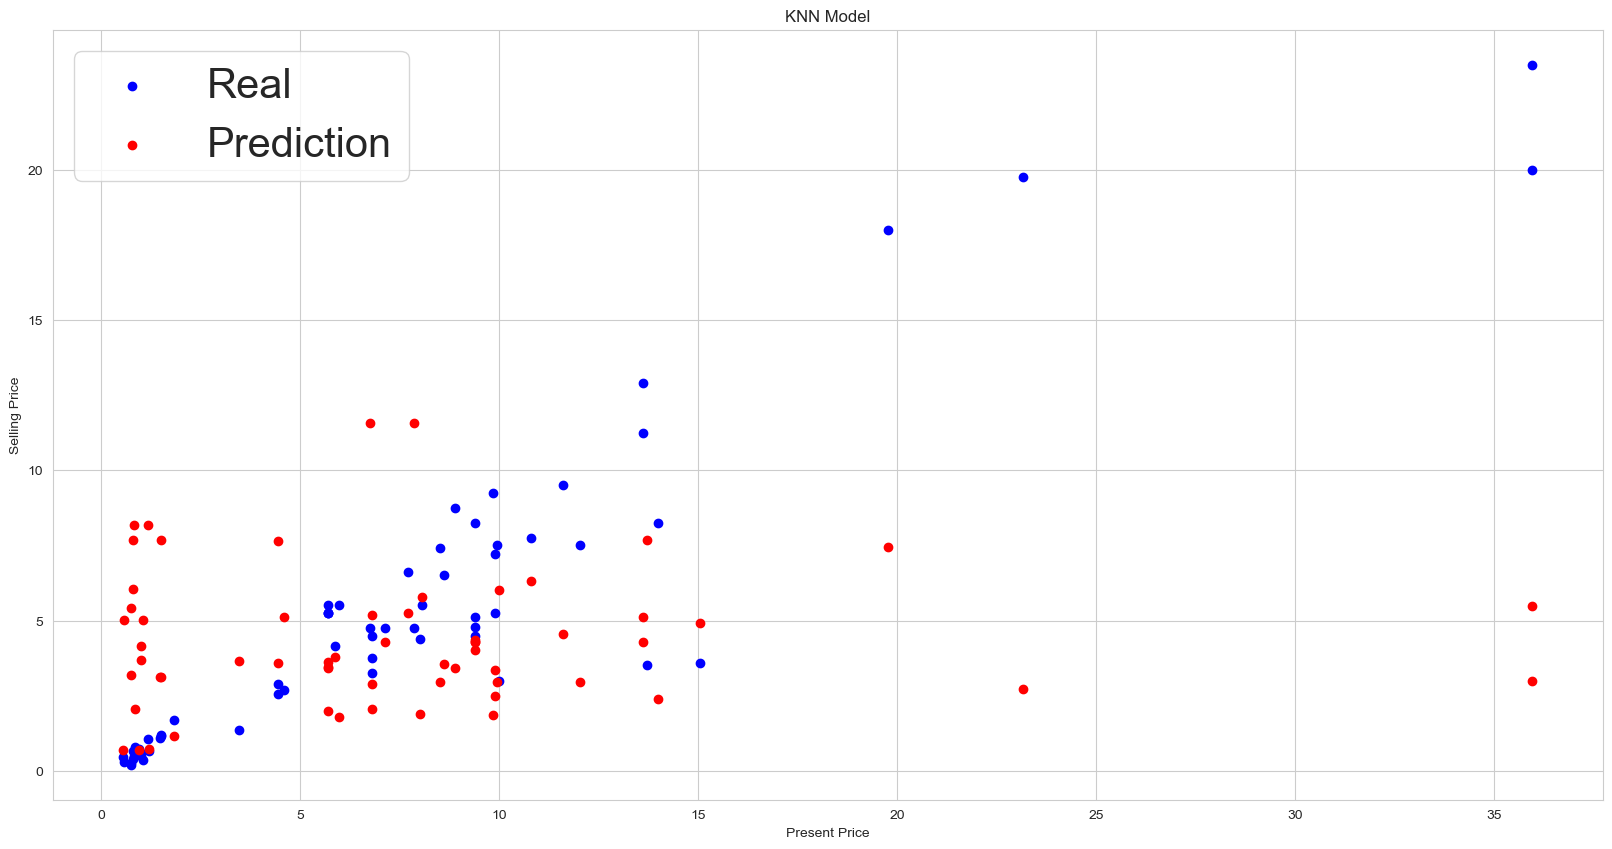

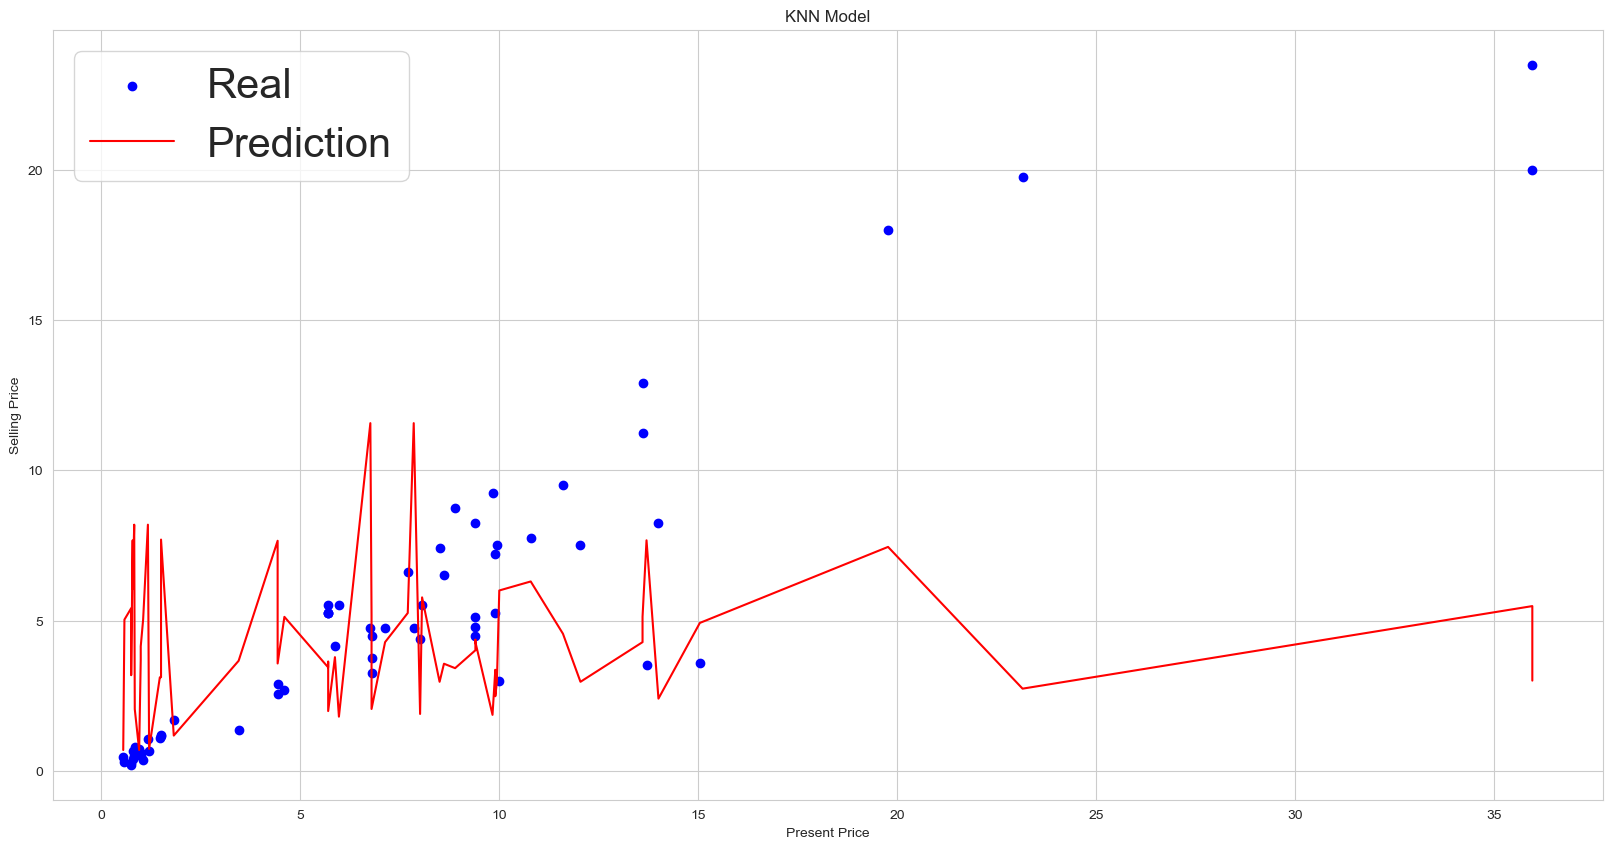

In [22]:
# Random Forest Model
X_test.insert(0, "Y_test_rf", Y_test)
X_test.insert(0, "Y_pred_rf", Y_pred)
df = X_test.sort_values(by="Present_Price")

# Checking the model by visualization
plt.figure(figsize=(20, 10))
plt.scatter(df.Present_Price ,df.Y_test_rf, color='blue', label="Real")
plt.scatter(df.Present_Price, df.Y_pred_rf, color='red', label="Prediction")
plt.legend(fontsize=30)
plt.title("Random Forest Model")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(df.Present_Price , df.Y_test_rf, color='blue', label="Real")
plt.plot(df.Present_Price, df.Y_pred_rf, color='red', label="Prediction")
plt.legend(fontsize=30)
plt.title("Random Forest Model")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.show()

# KNN Model
X_test.insert(0, "Y_test_knn", Y_test)
X_test.insert(0, "Y_pred_knn", Y_pred_knn)
df = X_test.sort_values(by="Present_Price")

# Checking the model by visualization
plt.figure(figsize=(20, 10))
plt.scatter(df.Present_Price ,df.Y_test_knn, color='blue', label="Real")
plt.scatter(df.Present_Price, df.Y_pred_knn, color='red', label="Prediction")
plt.legend(fontsize=30)
plt.title("KNN Model")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(df.Present_Price , df.Y_test_knn, color='blue', label="Real")
plt.plot(df.Present_Price, df.Y_pred_knn, color='red', label="Prediction")
plt.legend(fontsize=30)
plt.title("KNN Model")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.show()



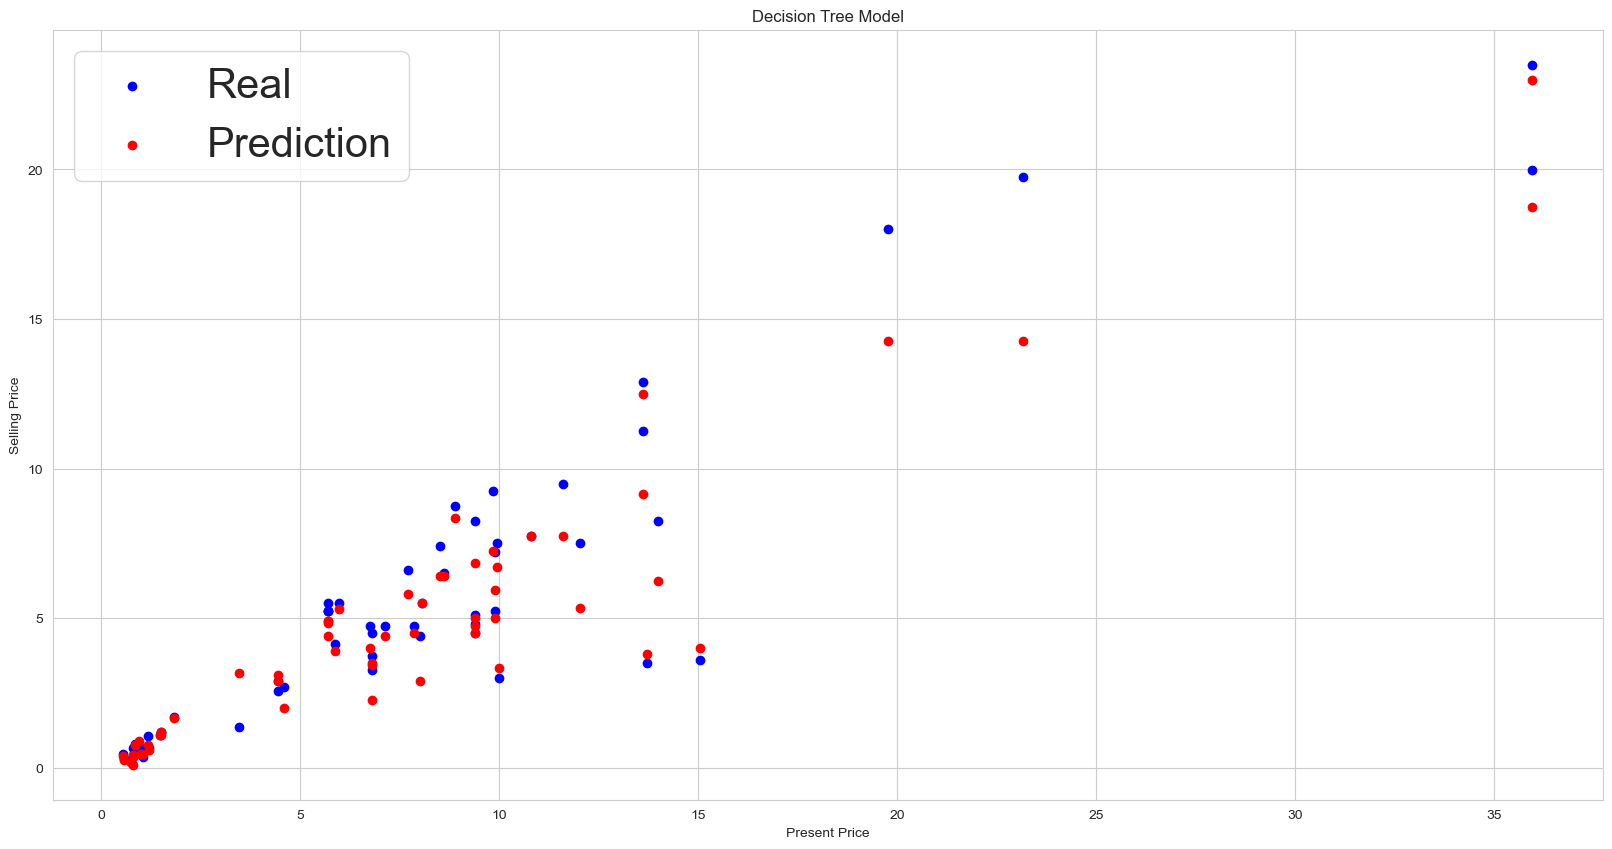

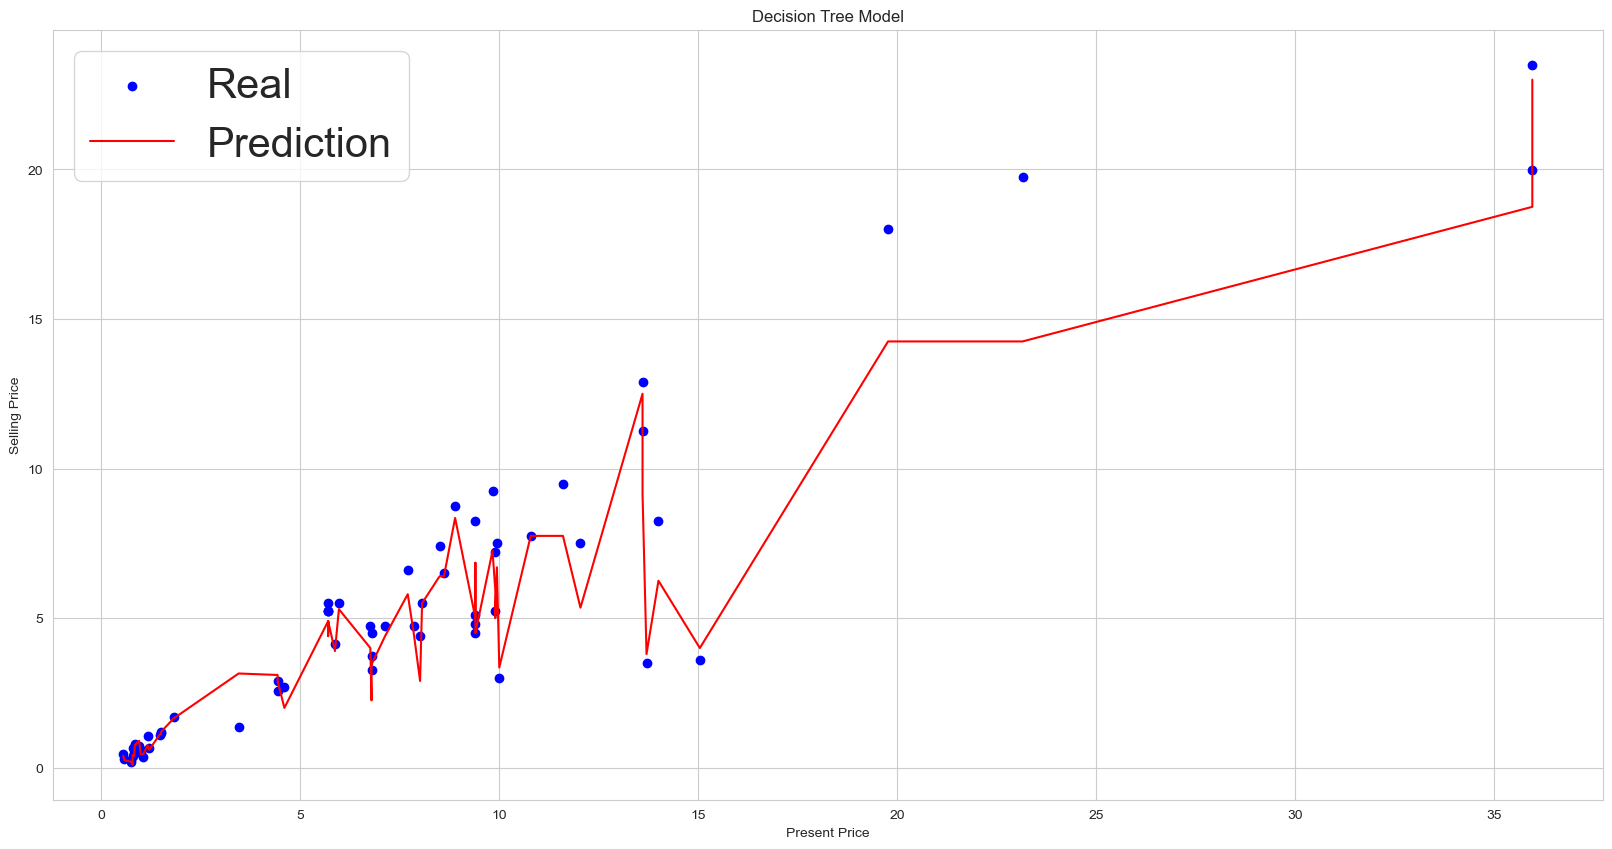

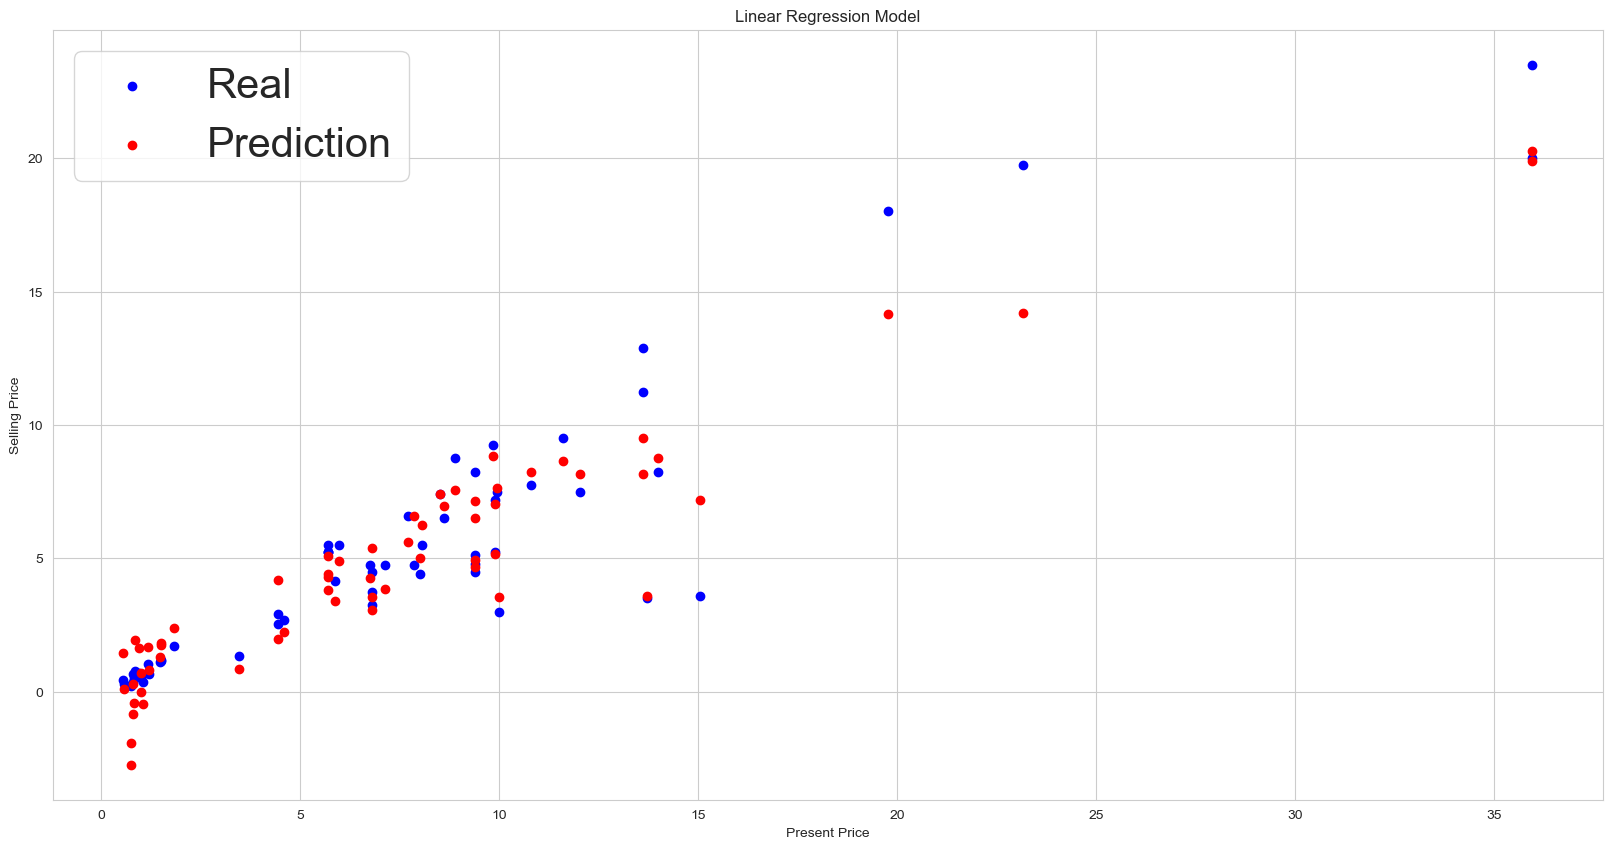

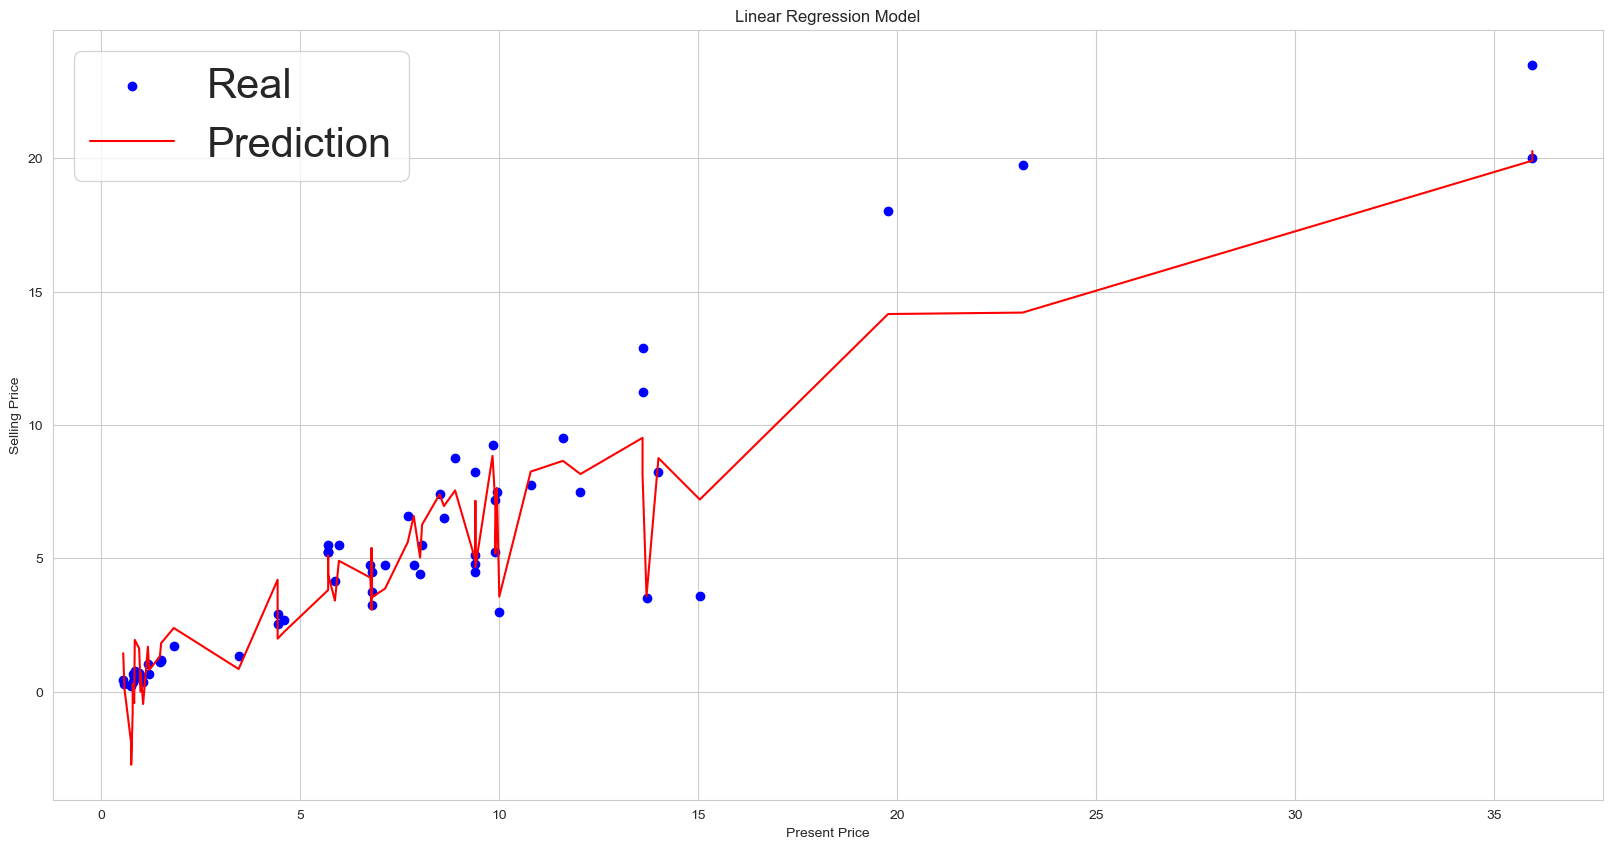

In [27]:
#Decision Tree Model
#Create a new DataFrame to store the test and predicted values
df = X_test.copy()
df['Y_test'] = Y_test.flatten()
df['Y_pred'] = dt_pred.flatten()
df = df.sort_values(by='Present_Price')

#Plot the real vs predicted values
plt.figure(figsize=(20, 10))
plt.scatter(df.Present_Price, df.Y_test, color='blue', label='Real')
plt.scatter(df.Present_Price, df.Y_pred, color='red', label='Prediction')
plt.legend(fontsize=30)
plt.title("Decision Tree Model")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(df.Present_Price, df.Y_test, color='blue', label='Real')
plt.plot(df.Present_Price, df.Y_pred, color='red', label='Prediction')
plt.legend(fontsize=30)
plt.title("Decision Tree Model")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.show()

#Linear Regression Model
#Create a new DataFrame to store the test and predicted values
df = X_test.copy()
df['Y_test'] = Y_test.flatten()
df['Y_pred'] = Y_pred.flatten()
df = df.sort_values(by='Present_Price')

#Plot the real vs predicted values
plt.figure(figsize=(20, 10))
plt.scatter(df.Present_Price, df.Y_test, color='blue', label='Real')
plt.scatter(df.Present_Price, df.Y_pred, color='red', label='Prediction')
plt.legend(fontsize=30)
plt.title("Linear Regression Model")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(df.Present_Price, df.Y_test, color='blue', label='Real')
plt.plot(df.Present_Price, df.Y_pred, color='red', label='Prediction')
plt.legend(fontsize=30)
plt.title("Linear Regression Model")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.show()